# **Logistic Regression Model**

## We're using annual survey data from the CDC to predict risk for mental health problems. These are self-report measures. There are a number of features that we will use in order to predict whether or not someone will experience mental health problems over a particular month-long period. 

## Install libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import r2_score
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

## Read in the data

In [2]:
pd.set_option('display.max_columns', 50)
LLCP2 = pd.read_csv(r'C:\Users\Nick\Desktop\GitProjects\LLCP_Project\LLCP2.csv')
LLCP2.head()

,SEX,_AGE_G,_BMI5CAT,_EDUCAG,_INCOMG,_RFDRHV5,_PACAT1,_RFHLTH,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
0,0.0,6.0,1.0,1.0,4.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,6.0,1.0,1.0,5.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,6.0,1.0,0.0,4.0,0.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,6.0,1.0,0.0,1.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,6.0,0.0,0.0,1.0,0.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,14.0,14.0,0.0,0.0


## Let's run a full logistic regression model first

In [3]:
X1 = LLCP2[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_RFDRHV5','_PACAT1','_RFHLTH','_HCVU651','EMPLOY1',
            'VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH']].values

y_logistic = LLCP2['MENTHLTH2'].values

In [4]:
logit_model=sm.Logit(y_logistic,X1)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.510215
         Iterations 6
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.183      
Dependent Variable: y                AIC:              459239.8121
Date:               2019-09-08 21:25 BIC:              459405.0677
No. Observations:   450016           Log-Likelihood:   -2.2960e+05
Df Model:           14               LL-Null:          -2.8109e+05
Df Residuals:       450001           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
--------------------------------------------------------------------
          Coef.    Std.Err.       z       P>|z|     [0.025    0.975]
--------------------------------------------------------------------
x1       -0.3335     0.0080    -41.8410   0.0000   -0.3491   -0.3179
x2       -0.2715     0.0024   -111.9938   0.0

#### We can see that all variables have p<.05.

# Model fitting

## Create two df's: X = features - target; y = only target

## Then do the test/train split and fit the model

In [5]:
X = LLCP2[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_RFDRHV5','_PACAT1','_RFHLTH','_HCVU651','EMPLOY1',
           'VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH']].values

y = LLCP2['MENTHLTH2'].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression(solver='liblinear', class_weight={0:1,1:2})
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
probs = logreg.predict_proba(X_test)
probs = probs[:,1]

# describes info about train and test set 
print("Number of rows/columns in X_test dataset: ", X_test.shape) 
print("Number of rows/columns in y_test dataset: ", y_test.shape) 
print("Number of rows/columns in X_train dataset: ", X_train.shape) 
print("Number of rows/columns in y_train dataset: ", y_train.shape) 

Number of rows/columns in X_test dataset:  (135005, 15)
Number of rows/columns in y_test dataset:  (135005,)
Number of rows/columns in X_train dataset:  (315011, 15)
Number of rows/columns in y_train dataset:  (315011,)


## Predicting the test set results and calculating the accuracy

In [22]:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.7386


## Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[73339 18951]
 [16334 26381]]


### The risk of Type 2 error (bottom left) seems a bit larger than type 1 error (top right).

#### True positive:     84398     _(We predicted a positive result and it was positive)_
#### True negative:    18475     _(We predicted a negative result and it was negative)_
#### False positive:    7892       _(We predicted a positive result and it was negative)_
#### False negative:   24240     _(We predicted a negative result and it was positive)_

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.79      0.81     92290
         1.0       0.58      0.62      0.60     42715

   micro avg       0.74      0.74      0.74    135005
   macro avg       0.70      0.71      0.70    135005
weighted avg       0.74      0.74      0.74    135005



### You can see above that the accuracy metrics look pretty good, at least for the 'Good Mental Health' ('0') value of the MENTHLTH target. The scores for the 'Poor Mental Health' value of '1' are much lower. This can be explained by the imbalanced nature of the data. I added the class_weight option, which when applied can give more weight to the minority class. This improved the accuracy a bit, but it's still lower than ideal. 

#### If you recall from the previous 'Exploratory Analysis' file, the value count for MENTHLTH2 is imbalanced. There are roughly 300,000 rows with a '0' and about 150,000 with a '1'. Since the '0' indicates 'Good Mental Health' and has far more rows, it makes sense that the model predicts 'Good Mental Health' more accurately then 'Poor Mental Health'. 

#### There are ways of balancing the data, which we'll do below...

## Receiver Operating Characteristic (ROC) Curve

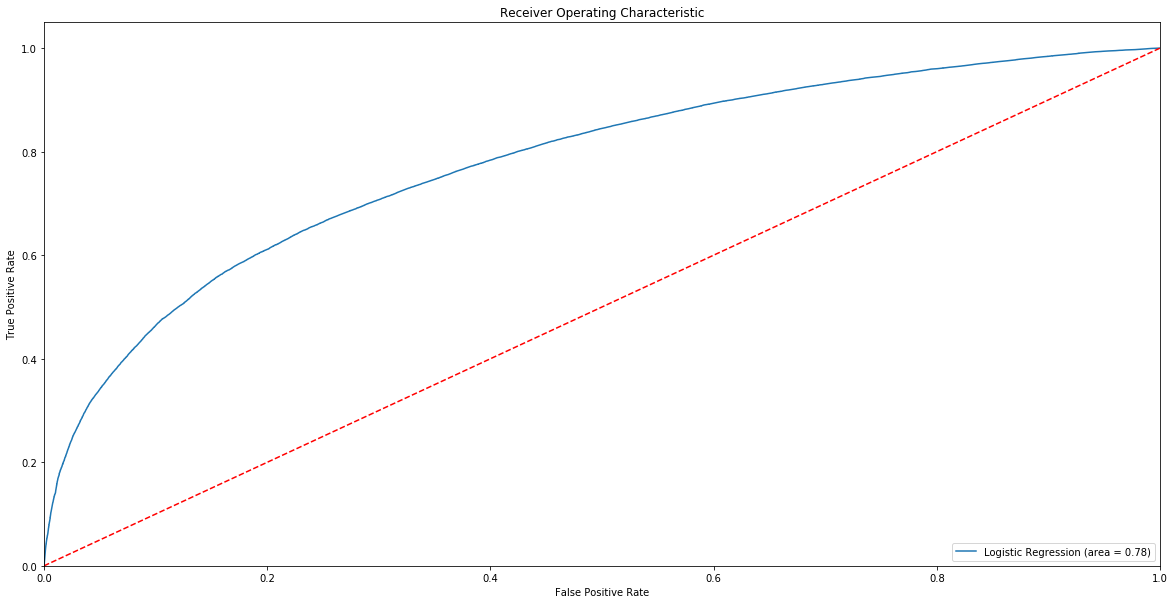

AUC: 0.778


In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('AUC: %.3f' % logit_roc_auc)

#### The receiver operating characteristic (ROC) curve is tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner).

# Dealing with unbalanced data:

## The data is unbalanced, indicted by 2 things: 

### (1) MENTHLTH2 value counts show twice as many '0' than '1' rows
### (2) The accuracy scores for the '1' values are far lower than the '0', showing the model is good at predicting 'Good Mental Health', but not 'Poor Mental Health'.

### There are various re-sampling methods for dealing with unbalanced data. We will utilize the 'Under/Over-sampling' techniques. This technique drops rows at random from the 'majority class', or the over-represented value. In this case, the '0' rows will be dropped at random until both value's are equal. This can lead to a loss of information, if there is not enough data. Since we have almost 500,000 total rows, this should not be a significant problem. 

## First, re-check value counts for the target...you can see twice as many '0' values

0.0    307337
1.0    142679
Name: MENTHLTH2, dtype: int64

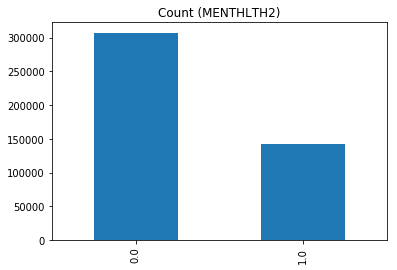

In [26]:
LLCP2.MENTHLTH2.value_counts().plot(kind='bar', title='Count (MENTHLTH2)');
LLCP2['MENTHLTH2'].value_counts()

## Let's first try Under-Sampling. Divide the classes. Now we undersample and concatenate back together. Then re-check the value counts. They are equal now, and we still have 142,679 rows to work with. 

Random under-sampling:
1.0    142679
0.0    142679
Name: MENTHLTH2, dtype: int64
(285358, 17)


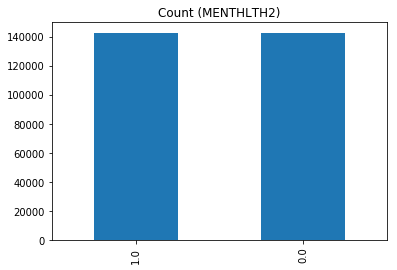

In [27]:
# Class count
count_class_0, count_class_1 = LLCP2.MENTHLTH2.value_counts()

# Divide by class
Good_MH = LLCP2[LLCP2['MENTHLTH2'] == 0]
Poor_MH = LLCP2[LLCP2['MENTHLTH2'] == 1]

Good_MH_under = Good_MH.sample(count_class_1)
LLCP2_under = pd.concat([Good_MH_under, Poor_MH], axis=0)

print('Random under-sampling:')
print(LLCP2_under.MENTHLTH2.value_counts())
print(LLCP2_under.shape)

LLCP2_under.MENTHLTH2.value_counts().plot(kind='bar', title='Count (MENTHLTH2)');

In [28]:
LLCP2_under.describe()

,SEX,_AGE_G,_BMI5CAT,_EDUCAG,_INCOMG,_RFDRHV5,_PACAT1,_RFHLTH,_HCVU651,EMPLOY1,VETERAN3,MARITAL,ADDEPEV2,POORHLTH,PHYSHLTH,MENTHLTH,MENTHLTH2
count,285358.000000,285358.000000,285358.000000,285358.000000,285358.000000,285358.000000,285358.000000,285358.000000,285358.000000,285358.000000,285358.000000,285358.000000,285358.000000,285358.000000,285358.000000,285358.000000,285358.000000
mean,0.422823,4.298982,0.712351,0.367489,3.732133,0.057692,2.434724,0.779113,0.922876,0.536291,0.119334,0.503736,0.259471,3.544222,5.079514,5.579269,0.500000
std,0.494009,1.611513,0.452667,0.482122,1.355502,0.233161,1.166978,0.414845,0.266789,0.498682,0.324182,0.499987,0.438345,8.045386,9.410015,9.275198,0.500001
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,3.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.000000,1.000000,0.000000,4.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.500000
75%,1.000000,6.000000,1.000000,1.000000,5.000000,0.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,5.000000,6.000000,1.000000
max,1.000000,6.000000,1.000000,1.000000,5.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,30.000000,30.000000,30.000000,1.000000


## Now let's use the new df (LLCP2_under) to model build, as before.

In [57]:
X_under = LLCP2_under[['SEX','_AGE_G','_BMI5CAT','_EDUCAG','_INCOMG','_RFDRHV5','_PACAT1','_RFHLTH','_HCVU651','EMPLOY1',
           'VETERAN3','MARITAL','ADDEPEV2','POORHLTH','PHYSHLTH']].values

y_under = LLCP2_under['MENTHLTH2'].values

In [67]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_under, y_under, test_size=0.3, random_state=0)
logreg_under = LogisticRegression(solver='liblinear')
logreg_under.fit(X_train2, y_train2)
y_pred2 = logreg_under.predict(X_test2)
probs_under = logreg_under.predict_proba(X_test2)
probs_under = probs_under[:,1]

# describes info about train and test set 
print("Number of rows/columns in X_test2 dataset: ", X_test2.shape) 
print("Number of rows/columns in y_test2 dataset: ", y_test2.shape) 
print("Number of rows/columns in X_train2 dataset: ", X_train2.shape) 
print("Number of rows/columns in y_train2 dataset: ", y_train2.shape) 

Number of rows/columns in X_test2 dataset:  (85608, 15)
Number of rows/columns in y_test2 dataset:  (85608,)
Number of rows/columns in X_train2 dataset:  (199750, 15)
Number of rows/columns in y_train2 dataset:  (199750,)


In [77]:
unique, counts = np.unique(y_train2, return_counts=True)
dict(zip(unique, counts))

{0.0: 99974, 1.0: 99776}

## Model accuracy

### We see the model accuracy score dropped a little bit, but it's still decent. Let's look closer.

In [78]:
y_pred2 = logreg_under.predict(X_test2)

print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg_under.score(X_test2, y_test2)))

Accuracy of logistic regression classifier on test set: 0.7051


## Confusion Matrix

In [79]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test2, y_pred2)
print(confusion_matrix)

[[33123  9582]
 [15664 27239]]


#### True positive:    33188     _(We predicted a positive result and it was positive)_
#### True negative:    27226     _(We predicted a negative result and it was negative)_
#### False positive:   9517      _(We predicted a positive result and it was negative)_
#### False negative:   15677     _(We predicted a negative result and it was positive)_

#### So, this model makes more correct predictions, than not and the false negative rate seems a bit higher than the false positive

## Check the precision, recall, and F1 scores

In [80]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test2,y_pred2))
print(classification_report(y_test2,y_pred2))
print(accuracy_score(y_test2, y_pred2))

[[33123  9582]
 [15664 27239]]
              precision    recall  f1-score   support

         0.0       0.68      0.78      0.72     42705
         1.0       0.74      0.63      0.68     42903

   micro avg       0.71      0.71      0.71     85608
   macro avg       0.71      0.71      0.70     85608
weighted avg       0.71      0.71      0.70     85608

0.7050976544248201


### Above, we that our metrics have been lowered a bit after undersampling, however, the scores for 'poor mental health'  ('0) have been raised and are similar to 'good mental heath' ('1'). This is a much better and more balanced model than before the undersampling.

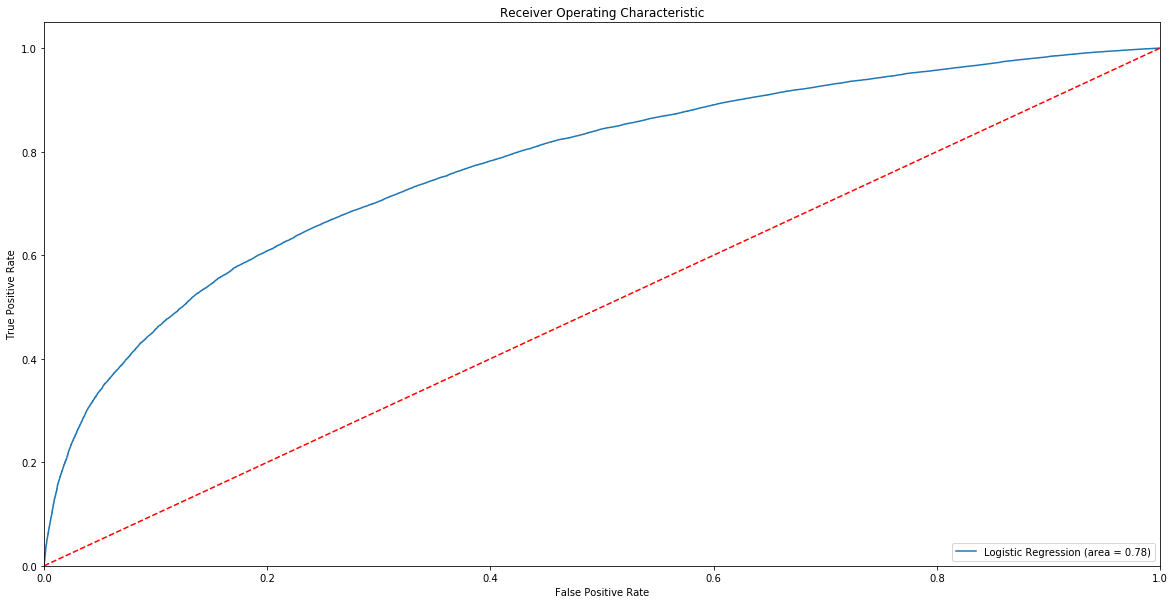

AUC: 0.775


In [35]:
logit_roc_auc = roc_auc_score(y_test2, probs_under)
fpr, tpr, thresholds = roc_curve(y_test2, probs_under)
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('AUC: %.3f' % logit_roc_auc)

### The ROC curve for this model looks pretty good

## Now, let's try Over-Sampling and compare. Always split the data into train/test sets BEFORE Over-Sampling. If not, you'll “bleed” information from the test set into the training of the models. We'll use SMOTE for this.

In [76]:
from imblearn.over_sampling import SMOTENC, RandomOverSampler

# setting up testing and training sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.3, random_state=0)

sm = SMOTENC(categorical_features=[0,1,2,3,4,5,6,7,8,9,10,11,12,13], sampling_strategy='minority', random_state=0)
X_train_over, y_train_over = sm.fit_resample(X_train3, y_train3)

# describes info about train and test set 
print("Number of rows/columns in X_test3 dataset: ", X_test3.shape) 
print("Number of rows/columns in y_test3 dataset: ", y_test3.shape) 
print("Number of rows/columns in X_train3 dataset: ", X_train3.shape) 
print("Number of rows/columns in y_train3 dataset: ", y_train3.shape) 
print("Number of rows/columns in X_train_over dataset: ", X_train_over.shape) 
print("Number of rows/columns in y_train_over dataset: ", y_train_over.shape) 

Number of rows/columns in X_test3 dataset:  (135005, 15)
Number of rows/columns in y_test3 dataset:  (135005,)
Number of rows/columns in X_train3 dataset:  (315011, 15)
Number of rows/columns in y_train3 dataset:  (315011,)
Number of rows/columns in X_train_over dataset:  (430094, 15)
Number of rows/columns in y_train_over dataset:  (430094,)


### We can see below that there are now an equal number of occurances on the target variable now. There are over twice as many observations for 'Poor Mental Health', or '1' on the MENTHLTH2 target variable compared before the resampling.

In [42]:
unique, counts = np.unique(y_train3, return_counts=True)
dict(zip(unique, counts))

{0.0: 215047, 1.0: 99964}

In [43]:
unique, counts = np.unique(y_train_over, return_counts=True)
dict(zip(unique, counts))

{0.0: 215047, 1.0: 215047}

## Now, let's rerun that Logistic Regression Algo

In [73]:
log_smote = LogisticRegression(solver='liblinear')
log_smote.fit(X_train_over, y_train_over)
smote_pred = log_smote.predict(X_test3)
smote_probs = log_smote.predict_proba(X_test3)
smote_probs = smote_probs[:,1]

In [74]:
print(confusion_matrix(y_test3,smote_pred))
print(classification_report(y_test3,smote_pred))
print(accuracy_score(y_test3, smote_pred))

[[71646 20644]
 [15615 27100]]
              precision    recall  f1-score   support

         0.0       0.82      0.78      0.80     92290
         1.0       0.57      0.63      0.60     42715

   micro avg       0.73      0.73      0.73    135005
   macro avg       0.69      0.71      0.70    135005
weighted avg       0.74      0.73      0.74    135005

0.7314247620458502


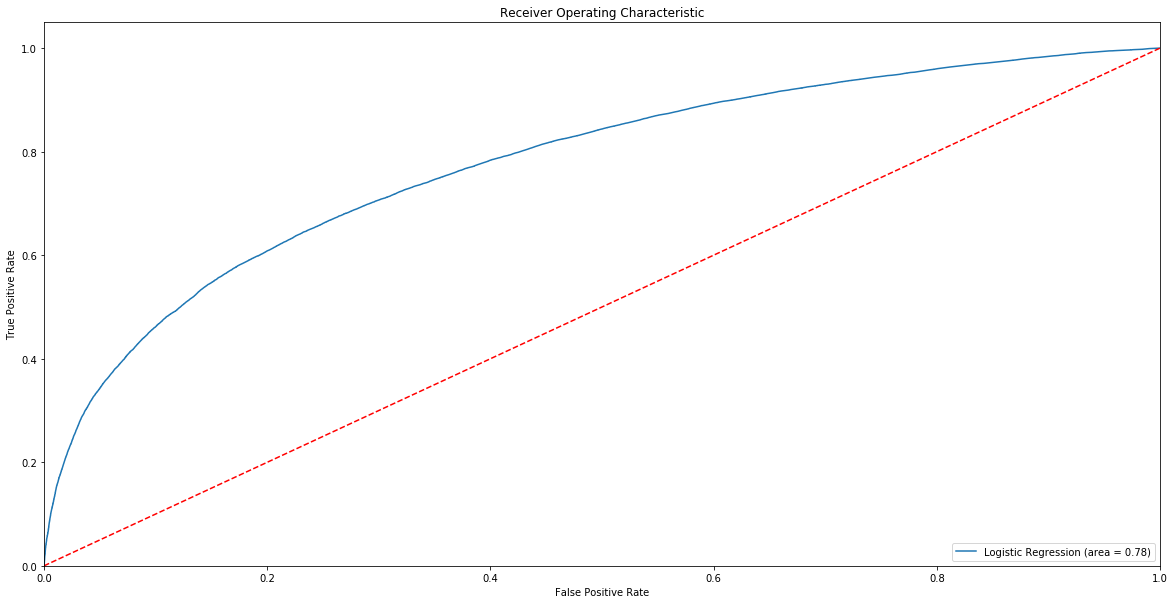

AUC: 0.777


In [46]:
logit_roc_auc = roc_auc_score(y_test3, smote_probs)
fpr, tpr, thresholds = roc_curve(y_test3, smote_probs)
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()
print('AUC: %.3f' % logit_roc_auc)

## We can see that the accuracy score for the Over-Sampled model is slightly higher at 73% vs 71% for Under-Sampling. However, this isn't the whole story because the accuracy of predicting Poor Mental Health (MENTHLTH2=1) dropped for the Over-Sampled model. The AUC was identical for both models too. Because we are trying to predict risk of poor mental health, we should consider the Under-Sampled model as the better model. 